In [81]:
import pandas as pd
from scrapy.http import TextResponse
import time
import re 
from textblob import TextBlob, Word
import numpy as np
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import collections
from collections import Counter
import matplotlib.pyplot as plt

# Q1, a

In [82]:
url='https://www.harkatu.am/companies/hy?2'


In [83]:
browser=webdriver.Chrome()

In [84]:
browser.get(url)

In [85]:
page = browser.page_source

In [86]:
browser.close()

In [87]:
print(page)

<html><head><script async="" src="//www.google-analytics.com/analytics.js"></script><script type="text/javascript" src="../wicket/resource/org.apache.wicket.resource.JQueryResourceReference/jquery/jquery-1.11.0.min-ver-8FC25E27D42774AEAE6EDBC0A18B72AA.js"></script>
<script type="text/javascript" src="../wicket/resource/org.apache.wicket.ajax.AbstractDefaultAjaxBehavior/res/js/wicket-event-jquery.min-ver-F070EDFAD7E5A1BD9662F385470094FF.js"></script>
<script type="text/javascript" src="../wicket/resource/org.apache.wicket.ajax.AbstractDefaultAjaxBehavior/res/js/wicket-ajax-jquery.min-ver-5FD38B9489AC6EA76009623682BEFC76.js"></script>
<script type="text/javascript" id="wicket-ajax-base-url">
/*<![CDATA[*/
Wicket.Ajax.baseUrl="companies/hy?0";
/*]]>*/
</script>
<script type="text/javascript" id="hiddenComponent_JS">
/*<![CDATA[*/
Wicket.Event.add(window, 'load', function (event) {     tokenManagerSkipEvent = false;function locationHashChanged() {if (tokenManagerSkipEvent) {     tokenManag

In [88]:
response = TextResponse(url=url, body=page, encoding="utf-8")

# All paid taxes

In [89]:
taxes = response.css("div[class='volume']::text").extract()

In [90]:
taxes

['1',
 '13,531,276',
 '13,570,605',
 '2',
 '12,126,039',
 '12,830,020',
 '3',
 '6,300,316',
 '6,684,445',
 '4',
 '4,544,427',
 '4,544,427',
 '5',
 '3,953,688',
 '4,295,157',
 '6',
 '3,150,072',
 '3,955,956',
 '7',
 '3,028,579',
 '3,769,765',
 '8',
 '3,740,465',
 '3,753,700',
 '9',
 '2,957,433',
 '3,414,762',
 '10',
 '2,649,726',
 '2,794,111',
 '11',
 '2,590,033',
 '2,590,033',
 '12',
 '1,646,242',
 '2,389,817',
 '13',
 '2,134,245',
 '2,356,659',
 '14',
 '1,630,605',
 '2,061,793',
 '15',
 '1,751,630',
 '1,751,630',
 '16',
 '1,273,390',
 '1,564,916',
 '17',
 '425,777',
 '1,485,612',
 '18',
 '846,454',
 '1,403,194',
 '19',
 '1,353,765',
 '1,399,955',
 '20',
 '1,344,333',
 '1,363,849',
 '21',
 '87,891',
 '1,316,943',
 '22',
 '1,273,536',
 '1,279,783',
 '23',
 '1,276,919',
 '1,276,919',
 '24',
 '2,863',
 '1,262,660',
 '25',
 '1,236,542',
 '1,261,087',
 '177,072,192',
 '221,020,204']

In [103]:
def paidtax(url):
    browser=webdriver.Chrome()
    time.sleep(2)
    browser.get(url)
    time.sleep(2)
    page = browser.page_source
    time.sleep(2)
    browser.close()
    time.sleep(2)
    response = TextResponse(url=url, body=page, encoding="utf-8")
    time.sleep(2)
    taxes = response.css("div[class='volume']::text").extract()
    time.sleep(2)
    paid_taxes = []
    i = 2
    while i < len(taxes):
        paid_taxes.append(taxes[i])
        i = i + 3
    return paid_taxes

In [92]:
all_urls = ["https://www.harkatu.am/companies/hy?1#p/{}".format(i) for i in range(1, 9)]

In [93]:
all_urls

['https://www.harkatu.am/companies/hy?1#p/1',
 'https://www.harkatu.am/companies/hy?1#p/2',
 'https://www.harkatu.am/companies/hy?1#p/3',
 'https://www.harkatu.am/companies/hy?1#p/4',
 'https://www.harkatu.am/companies/hy?1#p/5',
 'https://www.harkatu.am/companies/hy?1#p/6',
 'https://www.harkatu.am/companies/hy?1#p/7',
 'https://www.harkatu.am/companies/hy?1#p/8']

In [104]:
all_paid_taxes = []
for i in all_urls: 
    all_paid_taxes.extend(paidtax(i))
    time.sleep(2) 

In [105]:
len(all_paid_taxes)

200

# All organizations

In [97]:
org = response.css("h1>a>span::text").extract()

In [98]:
org

['ԳԱԶՊՐՈՄ ԱՐՄԵՆԻԱ',
 'ԳՐԱՆԴ ՏՈԲԱԿՈ',
 'ԶԱՆԳԵԶՈՒՐԻ ՊՂՆՁԱՄՈԼԻԲԴԵՆԱՅԻՆ ԿՈՄԲԻՆԱՏ',
 'ՀԱՅԱՍՏԱՆԻ ԷԼԵԿՏՐԱԿԱՆ ՑԱՆՑԵՐ',
 'ԳԵՈՊՐՈՄԱՅՆԻՆԳ ԳՈԼԴ',
 'ԻՆՏԵՐՆԵՅՇՆԼ ՄԱՍԻՍ ՏԱԲԱԿ',
 'ՍԻՓԻԷՍ ՕԻԼ ՔՈՐՓՈՐԵՅՇՆ',
 'ՖԼԵՇ',
 'ԱԿՎԻԼՈՆ ԹՐԵՅԴ',
 'ԱՐՄԵՆԻԱ ՄԻՋԱԶԳԱՅԻՆ ՕԴԱՆԱՎԱԿԱՅԱՆՆԵՐ',
 'ՄԱՔՍ ՊԵՏՐՈԼ',
 'ՀԱՅԿԱԿԱՆ ԱՏՈՄԱՅԻՆ ԷԼԵԿՏՐԱԿԱՅԱՆ',
 'ԱՐՄԵՆԻԱՆ ՄԱՅՆԻՆԳ ՔՈՆԹՐԱՔԹՈՐ',
 'ՅՈՒՔՈՄ',
 'ԳԱԶՊՐՈՄ ԱՐՄԵՆԻԱ ՓԲԸ ՏՐԱՆՍԳԱԶ',
 'ՍԻԹԻ',
 'ԳՐԱՆԴ ՄԱՍՏԵՐ',
 'ԳՐԱՆԴ ՔԵՆԴԻ',
 'ՄՈԲԱՅԼ ՍԵՆԹՐ ԱՐԹ',
 'ԱՄԵՐԻԱԲԱՆԿ',
 'ԱԼԵՔՍ ԷՆԴ ՀՈԼԴԻՆԳ',
 'ՎԵՈԼԻԱ ՋՈՒՐ',
 'ՀԱՅԲԻԶՆԵՍԲԱՆԿ ՓԲԸ',
 'ԱՎՏՈՆԵՐԿՐՈՂ -10',
 'ԵՐԵՎԱՆԻ ՋԵՐՄԱԷԼԵԿՏՐԱԿԵՆՏՐՈՆ']

In [99]:
len(org)

25

In [106]:
def org_scrap(url):
    browser=webdriver.Chrome()
    time.sleep(2)
    browser.get(url)
    time.sleep(2)
    page = browser.page_source
    time.sleep(2)
    browser.close()
    time.sleep(2)
    response = TextResponse(url=url, body=page, encoding="utf-8")
    organization_name = response.css("h1>a>span::text").extract()
    return organization_name

In [107]:
all_org=[] 
for i in range(1,9): 
    url = "https://www.harkatu.am/companies/hy?0#p/" + str(i) 
    current_org = org_scrap(url)
    all_org.extend(current_org) 
    time.sleep(2) 

In [108]:
len(all_org)

200

# All industries

In [ ]:
industry = response.css("div[class='industry']::text").extract()

In [ ]:
industry

In [ ]:
len(industry)

In [109]:
def ind_scrap(url):
    browser=webdriver.Chrome()
    time.sleep(2)
    browser.get(url)
    time.sleep(2)
    page = browser.page_source
    time.sleep(2)
    browser.close()
    time.sleep(2)
    response = TextResponse(url=url, body=page, encoding="utf-8")
    industry = response.css("div[class='industry']::text").extract()
    return industry

In [110]:
all_industries=[] 
for i in range(1,9): 
    url = "https://www.harkatu.am/companies/hy?0#p/" + str(i) 
    current_ind = ind_scrap(url)
    all_industries.extend(current_ind) 
    time.sleep(2) 


In [111]:
len(all_industries)

183

# Cleaning tax data to calculate mean

In [112]:
remove=','

In [113]:
new_all_paid_taxes =[]
for numbers in all_paid_taxes:
    temp= ""
    for i in numbers:
        if i not in remove:
            temp += i
    new_all_paid_taxes.append(temp)

In [114]:
print(new_all_paid_taxes)

['13570605', '12830020', '6684445', '4544427', '4295157', '3955956', '3769765', '3753700', '3414762', '2794111', '2590033', '2389817', '2356659', '2061793', '1751630', '1564916', '1485612', '1403194', '1399955', '1363849', '1316943', '1279783', '1276919', '1262660', '1261087', '1220359', '1218400', '1164814', '1128300', '1112962', '1099085', '1096554', '1069783', '1061270', '1046473', '1043767', '1010827', '1004964', '960942', '911332', '862030', '844676', '841605', '834277', '785707', '784674', '770479', '738037', '722658', '712742', '711728', '696962', '693692', '684939', '676624', '666851', '653659', '648152', '645610', '645503', '633138', '632741', '631944', '630496', '613588', '604836', '601638', '593542', '579473', '558835', '558030', '545105', '544689', '541690', '533199', '533038', '528902', '528044', '519370', '501449', '496933', '487964', '483581', '477682', '472185', '471512', '449171', '440455', '438385', '433932', '433820', '416144', '406454', '405745', '405263', '401719',

In [115]:
len(new_all_paid_taxes)

200

In [116]:
type(new_all_paid_taxes)

list

In [117]:
np_new_all_paid_taxes = np.asarray(new_all_paid_taxes)

In [118]:
type(np_new_all_paid_taxes)

numpy.ndarray

In [119]:
np_new_all_paid_taxes= np_new_all_paid_taxes.astype(float)

# Q1,b Average tax paid

In [120]:
np.mean(np_new_all_paid_taxes )

809770.225

# Q1,c  Top 5 industries

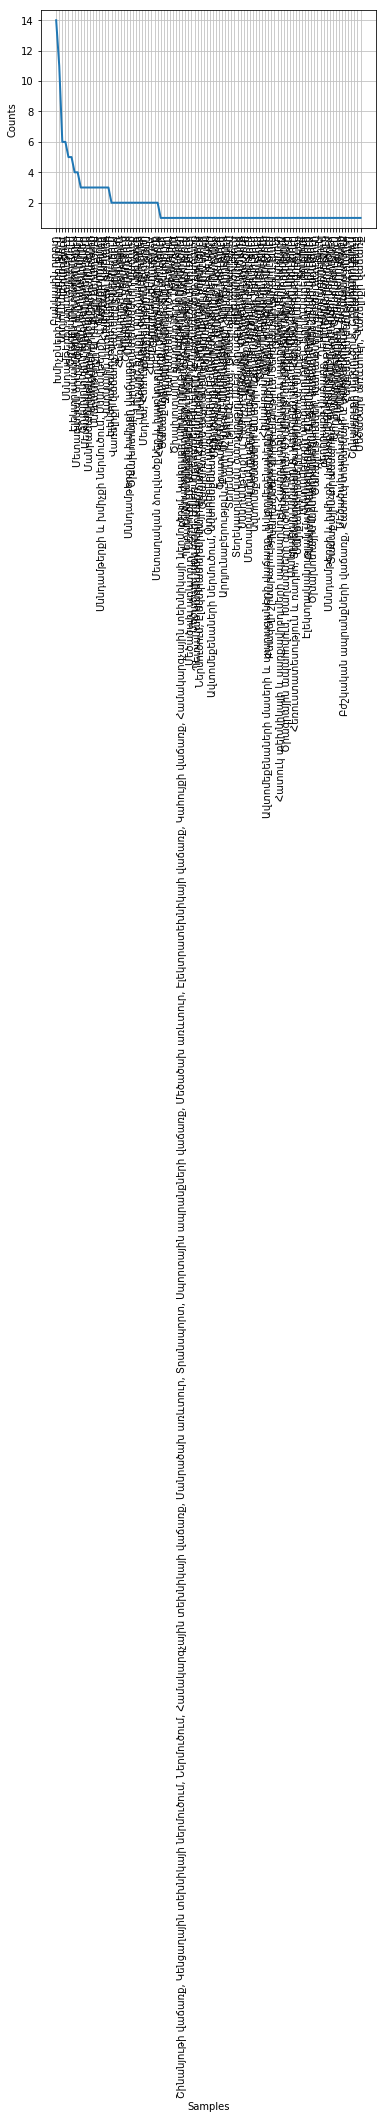

In [121]:
freq = nltk.FreqDist(all_industries)
freq.plot()

In [122]:
freq.most_common(5)

[('Բանկային ոլորտ', 14),
 ('Խմիչքների արտադրություն', 11),
 ('Արդյունաբերություն', 6),
 ('Ներմուծում', 6),
 ('Սննդամթերքի արտադրություն', 5)]